<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.simplefilter('ignore')
from scipy import stats as st
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
from sklearn.utils import shuffle
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    train_test_split
)


from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (StandardScaler)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
np.random.seed(0)
from scipy import stats as st
from sklearn.dummy import DummyRegressor

In [2]:
try :
    gold_industry_test  = pd.read_csv('/datasets/gold_industry_test.csv',parse_dates=['date'])
    gold_industry_train  = pd.read_csv('/datasets/gold_industry_train.csv',parse_dates=['date'])
    gold_industry_full  = pd.read_csv('/datasets/gold_industry_full.csv',parse_dates=['date'])
except:
    gold_industry_test  = pd.read_csv('gold_industry_test.csv',parse_dates=['date'])
    gold_industry_train  = pd.read_csv('gold_industry_train.csv',parse_dates=['date'])
    gold_industry_full  = pd.read_csv('gold_industry_full.csv',parse_dates=['date'])
display(gold_industry_test.head(10))
display(gold_industry_train.head(10))
display(gold_industry_full.head(10))        

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805
5,2017-12-09 19:59:59,5.848338,6.234198,4.468803,37.816555,547.515088,85.875864,8.040386,7.500718,1201.408796,...,22.977833,-499.910098,20.000113,-500.584093,18.003899,-500.326371,12.978611,-499.966502,19.988673,-500.742891
6,2017-12-09 20:59:59,6.172839,6.213598,4.458071,36.829223,518.363800,73.426294,7.641859,7.498470,1198.551240,...,22.964590,-500.083299,20.010567,-500.545746,18.040164,-498.936442,12.988702,-499.985412,20.014155,-499.443855
7,2017-12-09 21:59:59,5.743825,6.264367,4.428267,37.170131,500.494798,75.915232,7.230213,7.496599,1201.172468,...,23.010484,-500.498525,20.043525,-499.701442,17.991164,-500.324632,13.000809,-500.181711,20.001605,-500.229965
8,2017-12-09 22:59:59,5.558520,6.167472,4.370640,37.356892,540.990643,79.668503,7.089240,7.524634,1195.305111,...,22.979813,-500.451722,19.995022,-500.415107,18.057379,-499.238503,13.011922,-500.067255,20.002796,-504.347015
9,2017-12-09 23:59:59,5.473143,6.076597,4.274908,38.631317,492.146649,90.792119,7.367698,6.543369,1203.076302,...,23.050901,-501.185001,20.016755,-499.840744,17.991566,-500.303770,13.023215,-500.018271,20.015115,-515.537548


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
5,2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,...,9.302669,41.633678,6.482968,10.049416,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638
6,2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,...,9.103047,41.995316,6.533849,10.058141,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575
7,2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,1000.166602,...,9.369209,42.452727,6.130823,9.935481,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959
8,2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,1000.026864,...,9.437044,43.404078,5.834140,10.071156,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948
9,2016-01-15 09:00:00,6.747693,5.974832,2.539114,38.553938,566.616045,60.308763,13.996130,6.800263,1000.332327,...,9.582874,43.487291,5.706261,10.242511,5.214161,70.973641,2.200997,10.473539,1.171183,17.717049


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
5,2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,...,9.302669,41.633678,6.482968,10.049416,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638
6,2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,...,9.103047,41.995316,6.533849,10.058141,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575
7,2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,1000.166602,...,9.369209,42.452727,6.130823,9.935481,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959
8,2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,1000.026864,...,9.437044,43.404078,5.834140,10.071156,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948
9,2016-01-15 09:00:00,6.747693,5.974832,2.539114,38.553938,566.616045,60.308763,13.996130,6.800263,1000.332327,...,9.582874,43.487291,5.706261,10.242511,5.214161,70.973641,2.200997,10.473539,1.171183,17.717049


In [3]:
print(gold_industry_full.shape)
print(gold_industry_train.shape)
print(gold_industry_test.shape)

(19439, 87)
(14579, 87)
(4860, 53)


In [4]:
#gold_industry_test.hist(figsize=(20,20),bins=30);

In [5]:
#функция для получения общей информации о датафрейме
def df_inf(data): 
    display(data.head())
    display(data.describe(include='all').T)
    display(data.info())
    for column in data.columns:
        display()
        display(column)
        display(data[column].unique())
    display(data[data.duplicated()])
    display(pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm') )

In [6]:
df_inf(gold_industry_test)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
date,4860,4860,2018-03-04 08:59:59,1,2017-12-09 14:59:59,2018-08-18 10:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rougher.input.feed_au,4860.0,NaN,NaT,NaN,NaT,NaT,8.005584,1.99359,0.01,6.574363,7.812923,9.556589,13.417156
rougher.input.feed_ag,4860.0,NaN,NaT,NaN,NaT,NaT,8.547348,1.958601,0.01,6.975898,8.179714,10.084339,14.533698
rougher.input.feed_pb,4832.0,NaN,NaT,NaN,NaT,NaT,3.579662,1.029377,0.01,2.903612,3.540772,4.199847,7.142594
rougher.input.feed_sol,4838.0,NaN,NaT,NaN,NaT,NaT,37.095864,4.926284,0.01,34.510841,37.499761,40.461315,53.477742
rougher.input.feed_rate,4856.0,NaN,NaT,NaN,NaT,NaT,490.285103,94.371623,0.012786,434.099695,502.118742,555.596563,702.523396
rougher.input.feed_size,4816.0,NaN,NaT,NaN,NaT,NaT,59.1134,19.125122,0.046369,47.596984,55.509481,66.661547,363.989699
rougher.input.floatbank10_sulfate,4857.0,NaN,NaT,NaN,NaT,NaT,12.055735,3.407642,0.018907,9.890429,11.997859,14.496072,30.010759
rougher.input.floatbank10_xanthate,4859.0,NaN,NaT,NaN,NaT,NaT,6.101308,1.042754,0.015783,5.499808,6.099805,6.802101,9.396928
rougher.state.floatbank10_a_air,4859.0,NaN,NaT,NaN,NaT,NaT,1108.635895,156.493143,300.792494,999.715729,1001.414798,1202.837565,1521.980372


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        4860 non-null   datetime64[ns]
 1   rougher.input.feed_au                       4860 non-null   float64       
 2   rougher.input.feed_ag                       4860 non-null   float64       
 3   rougher.input.feed_pb                       4832 non-null   float64       
 4   rougher.input.feed_sol                      4838 non-null   float64       
 5   rougher.input.feed_rate                     4856 non-null   float64       
 6   rougher.input.feed_size                     4816 non-null   float64       
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64       
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64       
 9   rougher.

None

'date'

array(['2017-12-09T14:59:59.000000000', '2017-12-09T15:59:59.000000000',
       '2017-12-09T16:59:59.000000000', ...,
       '2018-08-18T08:59:59.000000000', '2018-08-18T09:59:59.000000000',
       '2018-08-18T10:59:59.000000000'], dtype='datetime64[ns]')

'rougher.input.feed_au'

array([4.36549126, 4.36278136, 5.08168113, ..., 6.6274581 , 6.70224271,
       6.63300207])

'rougher.input.feed_ag'

array([6.15871773, 6.04813022, 6.08274535, ..., 6.01514903, 6.09759212,
       5.90879349])

'rougher.input.feed_pb'

array([3.87572678, 3.90253661, 4.56407841, ..., 2.46612739, 2.27895549,
       2.4408994 ])

'rougher.input.feed_sol'

array([39.13511856, 39.71390632, 37.20868323, ..., 39.84142264,
       37.72837472, 36.95854   ])

'rougher.input.feed_rate'

array([555.82020835, 544.73168688, 558.1551102 , ..., 563.73314595,
       549.81249019, 573.07604913])

'rougher.input.feed_size'

array([ 94.54435803, 123.74242952,  82.61085467, ...,  61.28734694,
        59.63703703,  58.50926179])

'rougher.input.floatbank10_sulfate'

array([ 6.14698197,  6.21011918,  7.36382406, ..., 13.72369225,
       13.74650995, 13.70777469])

'rougher.input.floatbank10_xanthate'

array([9.30861213, 9.29770949, 9.00356206, ..., 6.70014826, 6.70641659,
       6.82024533])

'rougher.state.floatbank10_a_air'

array([1196.23811223, 1201.90417739, 1200.82692611, ..., 1000.01471835,
        999.63574846, 1000.58915597])

'rougher.state.floatbank10_a_level'

array([-299.86274301, -299.90730825, -300.12411601, ..., -400.32087688,
       -399.48488429, -398.87958635])

'rougher.state.floatbank10_b_air'

array([1147.24824118, 1154.08780412, 1150.75467553, ..., 1600.57216897,
       1599.8522124 , 1598.97524952])

'rougher.state.floatbank10_b_level'

array([-500.3631647 , -500.03657999, -499.98600862, ..., -449.35198948,
       -449.44882616, -451.23863801])

'rougher.state.floatbank10_c_air'

array([1047.27906544, 1054.00975578, 1049.182824  , ..., 1601.07920649,
       1599.32594614, 1600.05813901])

'rougher.state.floatbank10_c_level'

array([-500.35409056, -500.23733476, -500.0146956 , ..., -450.84632445,
       -448.81216582, -451.27144843])

'rougher.state.floatbank10_d_air'

array([ 948.75660844,  944.13879272,  948.08546387, ..., 1597.86266955,
       1614.61289227, 1610.1828736 ])

'rougher.state.floatbank10_d_level'

array([-498.43941603, -496.866953  , -499.9970031 , ..., -449.05382668,
       -449.77466494, -450.46018979])

'rougher.state.floatbank10_e_air'

array([ 849.44191754,  851.58976668,  850.17008638, ..., 1400.35325671,
       1401.62649573, 1399.19466323])

'rougher.state.floatbank10_e_level'

array([-499.2555029 , -499.04046576, -500.27033414, ..., -448.86637351,
       -447.6074403 , -450.33268105])

'rougher.state.floatbank10_f_air'

array([ 850.1122457 ,  851.34560554,  849.55790507, ..., 1399.930779  ,
       1400.15868455, 1399.63829037])

'rougher.state.floatbank10_f_level'

array([-499.4071117 , -499.12256076, -500.19870226, ..., -449.38888018,
       -448.03546649, -450.19872236])

'rougher.input.floatbank11_sulfate'

array([ 6.16893878,  6.20951712,  7.35830841, ..., 13.71611072,
       13.75827721, 13.81267382])

'rougher.input.floatbank11_xanthate'

array([9.30985188, 9.29719433, 9.0006242 , ..., 6.70349453, 6.70296911,
       6.79062427])

'primary_cleaner.input.sulfate'

array([ 95.24842664,  98.8805383 , 119.49754475, ..., 144.44772776,
       147.94488485, 138.12040887])

'primary_cleaner.input.depressant'

array([ 8.07895679,  7.98416354,  8.0037519 , ..., 12.49944628,
       12.48152866, 12.46403238])

'primary_cleaner.input.feed_size'

array([6.5       , 6.65999985, 6.42666651, ..., 8.25000023, 7.55166662,
       7.30316665])

'primary_cleaner.input.xanthate'

array([1.28304487, 1.24196858, 1.25974078, ..., 0.90401988, 0.8939132 ,
       0.89877907])

'primary_cleaner.state.floatbank8_a_air'

array([1648.75990646, 1646.54776267, 1647.36877866, ..., 1596.61031344,
       1603.05301481, 1603.43659843])

'primary_cleaner.state.floatbank8_a_level'

array([-399.86205326, -398.97708269, -399.78850601, ..., -499.41657273,
       -499.72857341, -499.86439966])

'primary_cleaner.state.floatbank8_b_air'

array([1650.13539491, 1648.21223972, 1648.39520592, ..., 1597.32592119,
       1600.53753225, 1597.45535273])

'primary_cleaner.state.floatbank8_b_level'

array([-399.95732109, -400.38326491, -400.16649015, ..., -499.94419408,
       -500.09602073, -500.26690531])

'primary_cleaner.state.floatbank8_c_air'

array([1648.83189046, 1648.91738717, 1648.95382817, ..., 1601.44187985,
       1597.56800501, 1600.74788192])

'primary_cleaner.state.floatbank8_c_level'

array([-400.58611561, -399.52134386, -400.46864078, ..., -499.65891317,
       -499.60103958, -500.54100158])

'primary_cleaner.state.floatbank8_d_air'

array([1649.46458174, 1651.4985915 , 1649.82156916, ..., 1599.75864463,
       1599.21351268, 1599.75405262])

'primary_cleaner.state.floatbank8_d_level'

array([-400.67330254, -399.7453286 , -400.07188374, ..., -501.14961637,
       -500.96469846, -499.21696206])

'secondary_cleaner.state.floatbank2_a_air'

array([34.94091896, 34.98074164, 34.95296726, ..., 25.9533644 ,
       26.11192875, 26.05951026])

'secondary_cleaner.state.floatbank2_a_level'

array([-500.15050979, -498.1310022 , -501.20464724, ..., -501.03303787,
       -499.49660791, -499.15164642])

'secondary_cleaner.state.floatbank2_b_air'

array([30.03186698, 29.96845329, 29.92702478, ..., 24.03946458,
       24.09441913, 23.93457025])

'secondary_cleaner.state.floatbank2_b_level'

array([-500.32833475, -586.01333036, -500.10662771, ..., -500.08897896,
       -500.25089997, -499.35175806])

'secondary_cleaner.state.floatbank3_a_air'

array([26.03398999, 25.97173699, 25.97825273, ..., 24.0101165 ,
       23.94551304, 23.9941835 ])

'secondary_cleaner.state.floatbank3_a_level'

array([-500.14779215, -499.60839245, -499.89005967, ..., -499.70538402,
       -500.81610752, -500.07856581])

'secondary_cleaner.state.floatbank3_b_air'

array([22.9523062 , 22.95844822, 23.00437554, ..., 24.02450094,
       23.99543383, 23.92448122])

'secondary_cleaner.state.floatbank3_b_level'

array([-500.03767788, -499.82130767, -500.01452863, ..., -499.46638264,
       -499.76154139, -499.98902359])

'secondary_cleaner.state.floatbank4_a_air'

array([23.0186224 , 23.02496288, 22.99382663, ..., 13.99631688,
       13.98396298, 13.98963179])

'secondary_cleaner.state.floatbank4_a_level'

array([-500.49270228, -501.15340926, -501.55966288, ..., -502.99529986,
       -503.67571368, -503.19529929])

'secondary_cleaner.state.floatbank4_b_air'

array([20.02020485, 20.05412154, 20.02914419, ..., 11.9800548 ,
       11.92874499, 12.05223256])

'secondary_cleaner.state.floatbank4_b_level'

array([-500.22029567, -500.31471091, -500.00066217, ..., -500.6077515 ,
       -500.58318347, -500.92854749])

'secondary_cleaner.state.floatbank5_a_air'

array([17.96351155, 17.979515  , 18.01272318, ...,  9.96450091,
        9.97035948,  9.96257412])

'secondary_cleaner.state.floatbank5_a_level'

array([-499.93948991, -499.27287133, -500.02476449, ..., -499.26171934,
       -498.82234276, -502.98635712])

'secondary_cleaner.state.floatbank5_b_air'

array([12.99030588, 12.99240352, 13.01644463, ...,  8.06504785,
        8.0163767 ,  7.97921906])

'secondary_cleaner.state.floatbank5_b_level'

array([-500.08099337, -499.97626781, -500.05843171, ..., -499.49239548,
       -499.01314476, -500.14683461])

'secondary_cleaner.state.floatbank6_a_air'

array([19.99033553, 20.01398578, 19.97376676, ..., 13.99780096,
       14.00003244, 13.98161378])

'secondary_cleaner.state.floatbank6_a_level'

array([-499.1915746 , -500.62547062, -501.39415458, ..., -600.62141616,
       -600.02474052, -598.07085499])

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


,0
date,0.000000
rougher.input.feed_au,0.000000
rougher.input.feed_ag,0.000000
rougher.input.feed_pb,0.600000
rougher.input.feed_sol,0.500000
rougher.input.feed_rate,0.100000
rougher.input.feed_size,0.900000
rougher.input.floatbank10_sulfate,0.100000
rougher.input.floatbank10_xanthate,0.000000
rougher.state.floatbank10_a_air,0.000000


In [7]:
#sns.heatmap(gold_industry_test.isna(), yticklabels=False, cbar=False, cmap="YlGnBu");

In [8]:
gold_industry_test[gold_industry_test['rougher.input.feed_size'].isna()][['date','rougher.input.feed_size']].tail(20)


,date,rougher.input.feed_size
4557,2018-08-04 05:59:59,NaN
4558,2018-08-04 06:59:59,NaN
4559,2018-08-04 07:59:59,NaN
4560,2018-08-04 08:59:59,NaN
4561,2018-08-04 09:59:59,NaN
4562,2018-08-04 13:59:59,NaN
4563,2018-08-04 14:59:59,NaN
4564,2018-08-04 15:59:59,NaN
4565,2018-08-04 16:59:59,NaN
4566,2018-08-04 17:59:59,NaN


In [9]:
gold_industry_test.loc[4561:4575,:][['date','rougher.input.feed_size']]

,date,rougher.input.feed_size
4561,2018-08-04 09:59:59,NaN
4562,2018-08-04 13:59:59,NaN
4563,2018-08-04 14:59:59,NaN
4564,2018-08-04 15:59:59,NaN
4565,2018-08-04 16:59:59,NaN
4566,2018-08-04 17:59:59,NaN
4567,2018-08-04 18:59:59,NaN
4568,2018-08-04 19:59:59,NaN
4569,2018-08-04 20:59:59,NaN
4570,2018-08-04 21:59:59,NaN


In [10]:
gold_industry_test[gold_industry_test['secondary_cleaner.state.floatbank2_a_air'].isna()]['date'].tail(15)


923    2018-02-06 18:59:59
924    2018-02-06 19:59:59
925    2018-02-06 20:59:59
926    2018-02-06 22:59:59
927    2018-02-06 23:59:59
928    2018-02-07 00:59:59
929    2018-02-07 01:59:59
930    2018-02-07 02:59:59
1215   2018-02-20 02:59:59
1216   2018-02-20 03:59:59
1562   2018-03-08 13:59:59
1563   2018-03-08 14:59:59
1564   2018-03-08 15:59:59
2300   2018-04-14 15:59:59
4843   2018-08-17 18:59:59
Name: date, dtype: datetime64[ns]

In [11]:
gold_industry_test.loc[1215:1230,:][['date','secondary_cleaner.state.floatbank2_a_air']]

,date,secondary_cleaner.state.floatbank2_a_air
1215,2018-02-20 02:59:59,NaN
1216,2018-02-20 03:59:59,NaN
1217,2018-02-20 04:59:59,34.793233
1218,2018-02-20 05:59:59,34.914542
1219,2018-02-20 06:59:59,34.924760
1220,2018-02-20 07:59:59,34.921538
1221,2018-02-20 08:59:59,34.915155
1222,2018-02-20 09:59:59,34.908773
1223,2018-02-20 10:59:59,34.902391
1224,2018-02-20 11:59:59,34.896008


In [12]:
display(pd.DataFrame(round(gold_industry_test.isna().mean()*100,1)).style.background_gradient('coolwarm') )

,0
date,0.000000
rougher.input.feed_au,0.000000
rougher.input.feed_ag,0.000000
rougher.input.feed_pb,0.600000
rougher.input.feed_sol,0.500000
rougher.input.feed_rate,0.100000
rougher.input.feed_size,0.900000
rougher.input.floatbank10_sulfate,0.100000
rougher.input.floatbank10_xanthate,0.000000
rougher.state.floatbank10_a_air,0.000000


In [13]:
print(gold_industry_full.shape)
print(gold_industry_train.shape)
print(gold_industry_test.shape)

(19439, 87)
(14579, 87)
(4860, 53)


In [14]:
display(gold_industry_full.columns)

Index(['date', 'rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate

In [15]:
gold_industry_train.columns

Index(['date', 'rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate

1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [16]:
train_rougher_output_recovery = gold_industry_train["rougher.output.recovery"] #recovery
train_rougher_input_feed_au   = gold_industry_train['rougher.input.feed_au'] #f
train_rougher_output_concentrate_au = gold_industry_train['rougher.output.concentrate_au'] #c
train_rougher_output_tail_au = gold_industry_train['rougher.output.tail_au'] #T
recovery_computed=(train_rougher_output_concentrate_au*(train_rougher_input_feed_au-train_rougher_output_tail_au)
                   /(train_rougher_input_feed_au*(train_rougher_output_concentrate_au-train_rougher_output_tail_au)))
recovery_computed=recovery_computed*100
display(recovery_computed.head(10))

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
5    88.156912
6    88.168065
7    87.668336
8    87.035862
9    88.280699
dtype: float64

Вычислили мае

In [17]:
mean_absolute_error(train_rougher_output_recovery, recovery_computed)

9.83758577644259e-15

1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [18]:
a=gold_industry_test.columns.values.tolist() 
b=gold_industry_train.columns.values.tolist()
result = list(set(a) ^ set(b))
display('Признаки которых нет в трейне' ,result)

'Признаки которых нет в трейне'

['final.output.tail_sol',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.concentrate_pb',
 'final.output.tail_pb',
 'primary_cleaner.output.tail_au',
 'final.output.concentrate_ag',
 'rougher.output.tail_sol',
 'rougher.output.tail_au',
 'rougher.output.concentrate_sol',
 'final.output.concentrate_sol',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.concentrate_ag',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'final.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'primary_cleaner.output.tail_pb',
 'final.output.tail_ag',
 'final.output.tail_au',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'secondary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'final.output.recovery',
 'secondary_cleaner.output.tail_au',
 'rougher.output.tail_ag',
 'secondar

 эти признаки являются  признаками которые показывают такие показатели как параметры выхода элементов после процессов - например выход золота , или долю золота в отвале , кроме того есть несколько признаков которые рассчитываются по другим например rougher.calculation.floatbank11_sulfate_to_au_feed

1.4. Проведите предобработку данных.

In [19]:
gold_industry_full=gold_industry_full.fillna(method='ffill')

In [20]:
gold_industry_train=gold_industry_train.fillna(method='ffill')

In [21]:
gold_industry_test=gold_industry_test.fillna(method='ffill')

In [22]:
gold_industry_test

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,...,14.003057,-503.152258,12.016724,-501.136446,10.041864,-499.338844,8.007022,-500.279583,14.001271,-602.072365
4856,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,...,14.031220,-503.471307,11.966426,-500.656842,10.051620,-498.318772,8.018091,-499.696138,13.958937,-599.213013
4857,2018-08-18 08:59:59,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,...,13.996317,-502.995300,11.980055,-500.607751,9.964501,-499.261719,8.065048,-499.492395,13.997801,-600.621416
4858,2018-08-18 09:59:59,6.702243,6.097592,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,...,13.983963,-503.675714,11.928745,-500.583183,9.970359,-498.822343,8.016377,-499.013145,14.000032,-600.024741


После изучения данных было замечено что иногда датчики не работают часть дня и зачастую данные есть в ближайших часах в этом дне. Поэтому заполнили данные ближайшими показателями где данные имеются

Вывод . 

Данные были загружены и изучены. В большинстве столбцов распределение похоже на нормальное, дубликатов не обнаружено, обнаружены пропуски, стратегия заполнения - ближайшими существующими значениями ячейки. 

## Анализ данных

2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения? Опишите выводы.


In [23]:
df=gold_industry_train.columns.values.tolist()
df.remove('date')
df

['rougher.input.feed_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'rougher.o

In [24]:
Au =[col for col in gold_industry_train.columns if ('au' and 'concentrate') in col]
Au

['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol']

<AxesSubplot:xlabel='rougher.output.concentrate_au', ylabel='Count'>

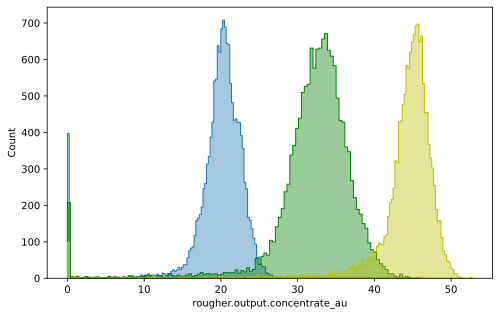

In [25]:
sns.histplot(gold_industry_train['rougher.output.concentrate_au'], alpha=0.4,  element="step")
sns.histplot(gold_industry_train['primary_cleaner.output.concentrate_au'], alpha=0.4,  element="step",color='g')
sns.histplot(gold_industry_train['final.output.concentrate_au'], alpha=0.4,  element="step",color='y')

Распределение похоже на нормальное , однако в случае с золотом концентрация после этапов растет с каждым этапом очистки ,а в ag падает, возможно стоит изменить что то в обработке чтобы ag не уходил в выброшенную руду.
В случае  с pb после первичной обработки концентрация упала, однако затем после финального этапа обработки падение концентрации практически  незаметно однако есть множество проб с концентрацией  0 на всех трех этапах, но при каждом новом этапе число таких образцов падает . Это верно для всех трех металлов. Удалим эти значения чтобы они не влияли на модели, так как скорее всего это связано с ошибкой датчиков

<AxesSubplot:xlabel='rougher.output.concentrate_ag', ylabel='Count'>

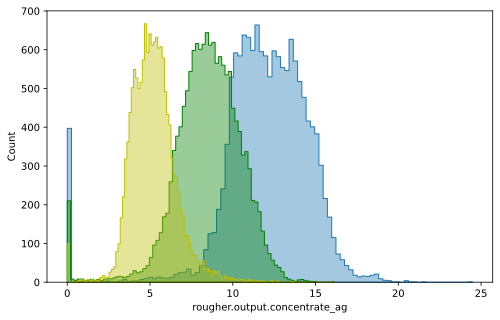

In [26]:
sns.histplot(gold_industry_train['rougher.output.concentrate_ag'], alpha=0.4,  element="step")
sns.histplot(gold_industry_train['primary_cleaner.output.concentrate_ag'], alpha=0.4,  element="step",color='g')
sns.histplot(gold_industry_train['final.output.concentrate_ag'], alpha=0.4,  element="step",color='y')

<AxesSubplot:xlabel='rougher.output.concentrate_pb', ylabel='Count'>

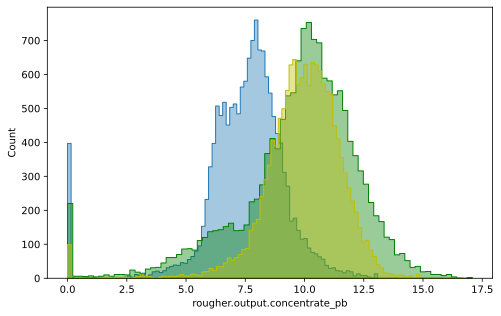

In [27]:
sns.histplot(gold_industry_train['rougher.output.concentrate_pb'], alpha=0.4,  element="step")
sns.histplot(gold_industry_train['primary_cleaner.output.concentrate_pb'], alpha=0.4,  element="step",color='g')
sns.histplot(gold_industry_train['final.output.concentrate_pb'], alpha=0.4,  element="step",color='y')

In [28]:
def drop_nul(df,col):
    df=df[df[col] >=1]
    return df

In [29]:
for i in ['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb','final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb']:
    gold_industry_train=drop_nul(gold_industry_train,i)

In [30]:
gold_industry_train

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14574,2017-12-09 09:59:59,4.599524,5.822083,4.255546,37.480479,559.895089,85.247019,6.775864,9.005425,1200.454685,...,0.000000,47.765393,2.925574,10.855586,7.053796,64.054699,1.761994,8.578502,3.365823,10.603464
14575,2017-12-09 10:59:59,4.658125,5.844800,4.241564,37.395565,561.464855,83.860651,6.770561,9.000889,1200.958146,...,0.000000,46.956275,3.076566,11.542302,6.929418,68.643324,1.567363,8.792890,3.120351,10.184715
14576,2017-12-09 11:59:59,5.335862,6.091855,4.617558,37.369774,560.889077,85.718304,7.762770,9.158609,1199.245914,...,0.000000,46.713954,3.224920,11.356233,6.803482,73.755150,1.529220,8.769645,3.141541,10.403181
14577,2017-12-09 12:59:59,4.838619,6.121323,4.144989,38.591551,559.031805,119.499241,7.356687,9.304952,1196.569267,...,0.000000,46.866780,3.195978,11.349355,6.862249,69.049291,1.612542,8.897321,3.130493,10.549470


In [31]:
gold_industry_test.columns

Index(['date', 'rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'prim

In [32]:
for i in ['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb','final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb']:
    gold_industry_full=drop_nul(gold_industry_full,i)

Удалили нулевые значения так как они скорее всего являются аномалиями и безусловно влияют на модели

2.2.  Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.


In [33]:
feed_size =[col for col in gold_industry_train.columns if ('feed_size') in col]
feed_size

['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

In [34]:
feed_size =[col for col in gold_industry_test.columns if ('feed_size') in col]
feed_size

['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

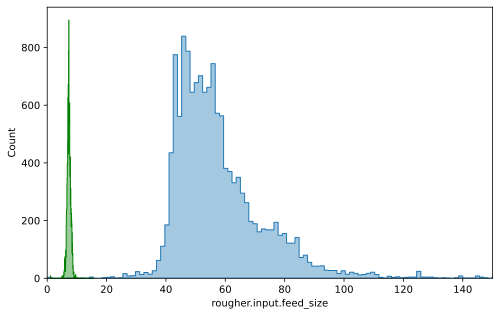

In [35]:
plt.xlim([0, 150])
sns.histplot(gold_industry_train['rougher.input.feed_size'], alpha=0.4,  element="step")
sns.histplot(gold_industry_train['primary_cleaner.input.feed_size'], alpha=0.4,  element="step",color='g');

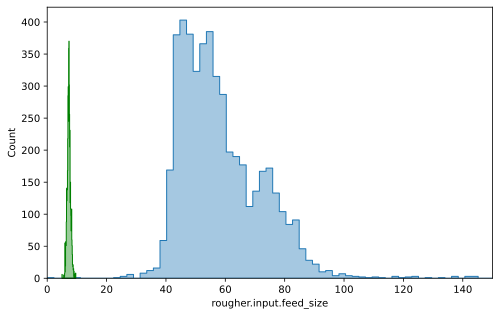

In [36]:
plt.xlim([0, 150])
sns.histplot(gold_industry_test['rougher.input.feed_size'], alpha=0.4,  element="step")
sns.histplot(gold_industry_test['primary_cleaner.input.feed_size'], alpha=0.4,  element="step",color='g');

In [37]:
alpha=0.03
results = st.ttest_ind(gold_industry_test['rougher.input.feed_size'].tolist(), gold_industry_train['rougher.input.feed_size'].tolist())
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('С вероятностью 4,57% среднее этих совокупостей одинаково') 

p-значение: 0.911255075101215
С вероятностью 4,57% среднее этих совокупостей одинаково


Распределение размеров гранул у обучающей и тестовой выборки одинаковые 

2.3. Исследуйте суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [38]:
rougher_output_concentrate_sum = gold_industry_train['rougher.output.concentrate_au']+gold_industry_train['rougher.output.concentrate_ag']+gold_industry_train['rougher.output.concentrate_pb']
primary_cleaner_output_concentrate_sum  =gold_industry_train['primary_cleaner.output.concentrate_au']+gold_industry_train['primary_cleaner.output.concentrate_ag']+gold_industry_train['primary_cleaner.output.concentrate_pb']
final_output_concentrate_sum= gold_industry_train['final.output.concentrate_au']+gold_industry_train['final.output.concentrate_ag']+gold_industry_train['final.output.concentrate_pb']

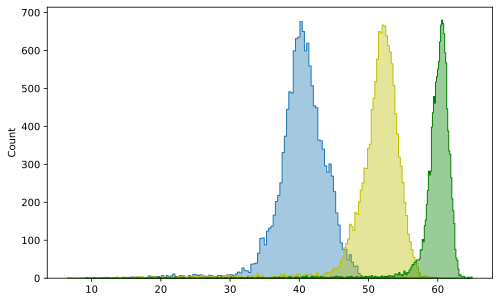

In [39]:
sns.histplot(rougher_output_concentrate_sum, alpha=0.4,  element="step")
sns.histplot(primary_cleaner_output_concentrate_sum, alpha=0.4,  element="step",color='y')
sns.histplot(final_output_concentrate_sum, alpha=0.4,  element="step",color='g');

Как и ожидалось общая концентрация металлов растет с каждым этапом 

In [40]:
f =[i for i in gold_industry_train.columns  if i not in  gold_industry_test.columns]
f.append('date')
f

['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final

In [41]:
add_feachers = gold_industry_full[f]
add_feachers.head()

,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,...,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,date
0,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,...,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297,2016-01-15 00:00:00
1,42050.861809,3498.370979,3489.981857,2.858998,20.050975,11.615865,7.278807,28.067063,86.843261,1.184827,...,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514,2016-01-15 01:00:00
2,42018.101184,3495.348910,3502.359819,2.945989,19.737170,11.695753,7.216833,27.454037,86.842308,1.162562,...,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849,2016-01-15 02:00:00
3,42029.447991,3498.578313,3499.162912,3.002340,19.320810,11.915047,7.175616,27.341277,87.226430,1.079755,...,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835,2016-01-15 03:00:00
4,42125.354245,3494.800771,3506.679315,3.169615,19.216101,12.411054,7.240205,27.041023,86.688794,1.012642,...,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686,2016-01-15 04:00:00


In [42]:
gold_industry_test

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,...,14.003057,-503.152258,12.016724,-501.136446,10.041864,-499.338844,8.007022,-500.279583,14.001271,-602.072365
4856,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,...,14.031220,-503.471307,11.966426,-500.656842,10.051620,-498.318772,8.018091,-499.696138,13.958937,-599.213013
4857,2018-08-18 08:59:59,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,...,13.996317,-502.995300,11.980055,-500.607751,9.964501,-499.261719,8.065048,-499.492395,13.997801,-600.621416
4858,2018-08-18 09:59:59,6.702243,6.097592,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,...,13.983963,-503.675714,11.928745,-500.583183,9.970359,-498.822343,8.016377,-499.013145,14.000032,-600.024741


In [43]:
gold_industry_test_merged=gold_industry_test.merge(add_feachers,how='left',on='date')
gold_industry_test_merged.shape

(4860, 87)

In [44]:
gold_industry_test_merged

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,0.000000,46.299438,3.598375,11.737832,6.717509,70.281454,1.389434,8.406690,2.517518,10.652193
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,0.000000,46.408188,3.367241,11.625587,6.799433,65.523246,1.602879,8.777171,2.819214,10.463847
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,0.000000,46.710119,3.192996,11.612338,6.824441,74.817644,1.393077,8.665858,2.938592,10.241498
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,0.609960,45.068492,3.500876,12.522030,6.666484,63.082720,2.047201,9.012745,3.513789,10.392631
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,0.851957,45.426882,3.438732,12.035050,7.033351,74.463380,1.616565,9.104377,2.839418,9.975397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,...,10.013738,42.435181,5.719113,10.621027,6.459561,68.786981,2.314786,10.286797,1.171459,19.131121
4856,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,...,9.841210,43.440341,5.410126,10.868937,6.258693,67.839536,2.423143,10.382891,1.239738,18.544924
4857,2018-08-18 08:59:59,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,...,10.119344,44.284117,5.437716,9.781181,6.057627,70.847012,2.161256,10.324415,0.961210,18.185262
4858,2018-08-18 09:59:59,6.702243,6.097592,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,...,9.876374,43.339714,5.664983,10.168953,5.484318,72.659046,2.064422,10.475957,1.050592,17.525656


In [45]:
gold_industry_full.shape


(18666, 87)

Вывод . на этом этапе были изученны особености каждого этапа очистки, выявлено что с каждым этапом концентрация металлов растет , но если рассматривать металлы по отдельности то видно что концентрация серебра падает. Также выявлено что размер гранул в тестовой и тренировочной выборке распределен одинаково.
Удалил выброс у нуля у концентраций для того чтобы убрать данные которые отличаются малой дисперсией и также скорее всего являются ошибками датчиков.

## Модель

3. Постройте модель
3.1. Напишите функцию для вычисления итоговой sMAPE.
3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.
Вам пригодятся формулы метрик качества:

3.1. Функция для вычисления smape

In [46]:
def smape(y,y_pred):
    
    return np.mean(abs(y-y_pred)/((abs(y)+abs(y_pred))/2))*100
def final_smape(rougher,final):
    return 0.25*rougher+0.75*final

In [47]:
a= pd.Series([2,1,5])
b= pd.Series([2.2,1.1,5,5])
smape(a,b) #проверил Функцию

6.349206349206354

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что ты сам себя проверяешь.
</div>

In [48]:
gold_industry_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [49]:
features_train = gold_industry_train.drop(['rougher.output.recovery','final.output.recovery','date'] , axis=1)
target_train = gold_industry_train[['final.output.recovery','rougher.output.recovery']]
features_test_merged=gold_industry_test_merged.drop(['rougher.output.recovery','final.output.recovery','date'] , axis=1)
target_test_merged=gold_industry_test_merged[['final.output.recovery','rougher.output.recovery']]
print(features_train.shape)
print(target_train.shape)
print(features_test_merged.shape)
print(target_test_merged.shape)

(13834, 84)
(13834, 2)
(4860, 84)
(4860, 2)


In [50]:
features_train

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,2.143149,10.411962,0.895447,16.904297
1,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,...,4.592547,9.001494,42.701629,6.029369,9.968944,5.257781,2.224930,10.462676,0.927452,16.634514
2,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,4.624775,8.842896,42.657501,6.055926,10.213995,5.383759,2.257889,10.507046,0.953716,16.208849
3,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,4.482453,9.122857,42.689819,6.047977,9.977019,4.858634,2.146849,10.422762,0.883763,16.532835
4,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,4.470737,8.871028,42.774141,6.148599,10.142511,4.939416,2.055292,10.360302,0.792826,16.525686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14574,4.599524,5.822083,4.255546,37.480479,559.895089,85.247019,6.775864,9.005425,1200.454685,-300.012582,...,0.000000,0.000000,47.765393,2.925574,10.855586,7.053796,1.761994,8.578502,3.365823,10.603464
14575,4.658125,5.844800,4.241564,37.395565,561.464855,83.860651,6.770561,9.000889,1200.958146,-300.013649,...,0.000000,0.000000,46.956275,3.076566,11.542302,6.929418,1.567363,8.792890,3.120351,10.184715
14576,5.335862,6.091855,4.617558,37.369774,560.889077,85.718304,7.762770,9.158609,1199.245914,-300.845518,...,0.000000,0.000000,46.713954,3.224920,11.356233,6.803482,1.529220,8.769645,3.141541,10.403181
14577,4.838619,6.121323,4.144989,38.591551,559.031805,119.499241,7.356687,9.304952,1196.569267,-299.512227,...,0.000000,0.000000,46.866780,3.195978,11.349355,6.862249,1.612542,8.897321,3.130493,10.549470


3.2 Обучение разных моделей. Оценка их качества кросс-валидацией.

In [51]:
scoring = make_scorer(smape, greater_is_better = False)
model_rfr = make_pipeline(StandardScaler(), RandomForestRegressor())

model_dtr = make_pipeline(StandardScaler(), DecisionTreeRegressor())

model_lr = make_pipeline(StandardScaler(),LinearRegression())
n_iter_search = 12 

<div class="alert alert-block alert-success">
<b>Успех:</b> Скорер определен правильно.
</div>

In [52]:
parameters_rfr = {'randomforestregressor__n_estimators':[1,100],
                  'randomforestregressor__max_depth':[1,10],
                  'randomforestregressor__random_state':[12345]}

parameters_dtr = {'decisiontreeregressor__max_depth':[1,15]}

parameters_lr = {'linearregression__normalize':[False]}

In [53]:

random_search = RandomizedSearchCV(model_lr, 
                                   param_distributions=parameters_lr, 
                                   n_iter=n_iter_search, 
                                   cv=3, 
                                   scoring = scoring,
                                      ) 
random_search.fit(features_train, target_train['final.output.recovery']) 
lr_final =random_search.best_score_
print("Лучшие параметры: {}".format(random_search.best_params_)) 
print("Лучшая оценка : {}".format(random_search.best_score_))


Лучшие параметры: {'linearregression__normalize': False}
Лучшая оценка : -3.237850472602592


In [54]:

random_search = RandomizedSearchCV(model_lr, 
                                   param_distributions=parameters_lr, 
                                   n_iter=n_iter_search, 
                                   cv=3, 
                                   scoring = scoring,
                                      ) 
random_search.fit(features_train, target_train['rougher.output.recovery']) 
lr_rougher =random_search.best_score_
print("Лучшие параметры: {}".format(random_search.best_params_)) 
print("Лучшая оценка : {}".format(random_search.best_score_))


Лучшие параметры: {'linearregression__normalize': False}
Лучшая оценка : -2.695750277358229


In [55]:
lr_general_smape= final_smape(lr_rougher,lr_final)
lr_general_smape

-3.1023254237915014

In [56]:
random_search = RandomizedSearchCV(model_dtr, param_distributions=parameters_dtr, n_iter=n_iter_search, cv=5,scoring = scoring)
random_search.fit(features_train, target_train['rougher.output.recovery'])
dtr_rougher =random_search.best_score_
# Вывод результатов
print("Лучшие параметры: {}".format(random_search.best_params_)) 
print("Лучшая оценка : {}".format(random_search.best_score_))

Лучшие параметры: {'decisiontreeregressor__max_depth': 15}
Лучшая оценка : -1.8324574311469282


In [57]:
random_search = RandomizedSearchCV(model_dtr, param_distributions=parameters_dtr, n_iter=n_iter_search, cv=5,scoring = scoring)
random_search.fit(features_train, target_train['final.output.recovery'])
dtr_final =random_search.best_score_
# Вывод результатов
print("Лучшие параметры: {}".format(random_search.best_params_)) 
print("Лучшая оценка : {}".format(random_search.best_score_))

Лучшие параметры: {'decisiontreeregressor__max_depth': 15}
Лучшая оценка : -4.166905015147153


In [58]:
dtr_general_smape= final_smape(dtr_rougher,dtr_final)
dtr_general_smape

-3.5832931191470965

In [59]:
random_search_rfr_rougher = RandomizedSearchCV(model_rfr, param_distributions=parameters_rfr , n_iter=n_iter_search, cv=5, n_jobs=-1,scoring = scoring)
random_search_rfr_rougher.fit(features_train, target_train['rougher.output.recovery'])
rfr_rougher =random_search_rfr_rougher.best_score_
# Вывод результатов
print("Лучшие параметры: {}".format(random_search_rfr_rougher.best_params_)) 
print("Лучшая оценка : {}".format(random_search_rfr_rougher.best_score_))


Лучшие параметры: {'randomforestregressor__random_state': 12345, 'randomforestregressor__n_estimators': 100, 'randomforestregressor__max_depth': 10}
Лучшая оценка : -1.065620083320996


In [60]:

random_search_rfr_final = RandomizedSearchCV(model_rfr, param_distributions=parameters_rfr , n_iter=n_iter_search, cv=5, n_jobs=-1,scoring = scoring)
random_search_rfr_final.fit(features_train, target_train['final.output.recovery'])
rfr_final =random_search_rfr_final.best_score_
# Вывод результатов
print("Лучшие параметры: {}".format(random_search_rfr_final.best_params_)) 
print("Лучшая оценка : {}".format(random_search_rfr_final.best_score_))

Лучшие параметры: {'randomforestregressor__random_state': 12345, 'randomforestregressor__n_estimators': 100, 'randomforestregressor__max_depth': 10}
Лучшая оценка : -1.7143217038841603


In [61]:
rfr_general_smape= final_smape(rfr_rougher,rfr_final)
rfr_general_smape

-1.5521462987433692

После применения моделей самой точной моделью показал себя случайный лес ,проведем проверку на тестовой выборке

In [62]:
features_test_merged.isna().sum()

rougher.input.feed_au            0
rougher.input.feed_ag            0
rougher.input.feed_pb            0
rougher.input.feed_sol           0
rougher.input.feed_rate          0
                                ..
final.output.concentrate_sol    28
final.output.tail_au            28
final.output.tail_ag            28
final.output.tail_pb            28
final.output.tail_sol           28
Length: 84, dtype: int64

In [63]:
test_rogher = random_search_rfr_rougher.predict(features_test_merged.dropna()) 
test_final = random_search_rfr_final.predict(features_test_merged.dropna())


In [64]:
smape_test_final = smape(target_test_merged['final.output.recovery'].dropna(),test_final)
smape_test_rougher= smape(target_test_merged['rougher.output.recovery'].dropna(),test_rogher)

In [65]:
result =final_smape(smape_test_rougher,smape_test_final)
result

19.15633656377594

In [66]:
print(smape_test_final)
print(smape_test_rougher)


4.666212802674561
62.62670784708008


Видим что модель переобучилась на данных для предсказания rougher

Попытка уменьшить переобученность модели уменьшив количество деревьев в случайном лесу и глубину дерева оказалась неудачной, попробую убрать признаки тренировочной выборки которых не было в тестовой выборке

In [67]:
features_train_3 = np.array(features_train.drop([
                                     'rougher.output.concentrate_au', 'primary_cleaner.output.tail_pb',
                                      'final.output.concentrate_au', 'primary_cleaner.output.concentrate_pb',
                                      'final.output.tail_sol',
                                      'rougher.calculation.floatbank10_sulfate_to_au_feed',
                                      'rougher.output.tail_sol', 'final.output.tail_au',
                                      'primary_cleaner.output.concentrate_ag',
                                      'rougher.calculation.floatbank11_sulfate_to_au_feed',
                                      'rougher.output.tail_ag', 'rougher.output.tail_pb',
                                      'secondary_cleaner.output.tail_pb', 'final.output.tail_ag',
                                      'final.output.concentrate_sol', 'primary_cleaner.output.tail_au',
                                      'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_ag',
                                      'rougher.output.tail_au', 'rougher.output.concentrate_ag',
                                      'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_pb',
                                      'final.output.concentrate_ag', 'secondary_cleaner.output.tail_au',
                                      'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
                                      'primary_cleaner.output.tail_sol',
                                      'rougher.calculation.sulfate_to_au_concentrate',
                                      'final.output.tail_pb', 'primary_cleaner.output.concentrate_au',
                                      'primary_cleaner.output.tail_ag', 'rougher.calculation.au_pb_ratio'], 
                                     axis=1)) #кроме целевых, убираю признаки, которых нет в test:




In [68]:
features_test=gold_industry_test.drop(['date'] , axis=1)


In [69]:
random_search_rfr_rougher_3 = RandomizedSearchCV(model_rfr, param_distributions=parameters_rfr , n_iter=n_iter_search, cv=5, n_jobs=-1,scoring = scoring)
random_search_rfr_rougher_3.fit(features_train_3, target_train['rougher.output.recovery'])
rfr_rougher_3 =random_search_rfr_rougher.best_score_
# Вывод результатов
print("Лучшие параметры: {}".format(random_search_rfr_rougher_3.best_params_)) 
print("Лучшая оценка : {}".format(random_search_rfr_rougher_3.best_score_))
test_rogher_3 = random_search_rfr_rougher_3.predict(features_test) 


Лучшие параметры: {'randomforestregressor__random_state': 12345, 'randomforestregressor__n_estimators': 100, 'randomforestregressor__max_depth': 10}
Лучшая оценка : -6.8126493558926


In [70]:
smape_test_rougher= smape(target_test_merged['rougher.output.recovery'],test_rogher_3)
print(smape_test_rougher)

2.9656031006250605


In [71]:
random_search_rfr_final_3 = RandomizedSearchCV(model_rfr, param_distributions=parameters_rfr , n_iter=n_iter_search, cv=5, n_jobs=-1,scoring = scoring)
random_search_rfr_final_3.fit(features_train_3, target_train['final.output.recovery'])
rfr_final_3 =random_search_rfr_final_3.best_score_
# Вывод результатов
print("Лучшие параметры: {}".format(random_search_rfr_final_3.best_params_)) 
print("Лучшая оценка : {}".format(random_search_rfr_final_3.best_score_))
test_final_3 = random_search_rfr_final_3.predict(features_test) 


Лучшие параметры: {'randomforestregressor__random_state': 12345, 'randomforestregressor__n_estimators': 100, 'randomforestregressor__max_depth': 1}
Лучшая оценка : -8.970556801587422


In [72]:
smape_test_final= smape(target_test_merged['final.output.recovery'],test_final_3)
print(smape_test_final)

8.814819918782318


In [73]:
final_smape_general=final_smape(smape_test_rougher,smape_test_final)
print(final_smape_general)

7.352515714243003


Вывод. были обучены 3 модели - случайный лес, дерево решений и линейную регрессию с помощью метода рандоминизированного поиска. Кросс валидация входит в этот метод. В ходе обучения на тненировачных данных лучше всего себя показала модель случайного леса по метрике качества sMAPE. Однако при проверке на тестовой выборке было показано значительно более худшее качество . Причиной этого является переобучение. В ходе борьбы с переобучением были опробованы снижение  количества деревьев в случайном лесу и их глубина , однако это не дало результатов. поэтому я решил что проблема с данными и признаков для обучения слишком много и попробовал использовать для обучения тренировочной модели только признаки которые были в тесте,это дало результат.

 Симметричная средняя абсолютная процентная ошибка на тестовой выборке 7.374937274463201


In [74]:
dummy_rougher = DummyRegressor(strategy='mean')
dummy_final = DummyRegressor(strategy='mean')
    
dummy_rougher.fit(features_train_3, target_train['rougher.output.recovery'])
dummy_final.fit(features_train_3, target_train['final.output.recovery'])
    
rougher = dummy_rougher.predict(features_test)
final = dummy_final.predict(features_test)
rougher =smape(target_test_merged['rougher.output.recovery'],test_final_3)
final=smape(target_test_merged['final.output.recovery'],test_final_3)
final_smape= final_smape(rougher,final)
print('Для стратегии mean', 'итоговая sMAPE =', round(final_smape,3))

Для стратегии mean итоговая sMAPE = 12.806


Общий вывод:
В ходе работы данные были иссследованы , обработаны(заполнены пропуски и удалены значения концентрации металлов которые были слишком маленькие), также была проведена проверка рассчета показателя. Затем данные тестовой выборки были дополнены недостающими признаками( которые были в тренировачной выборке). Были натренированы модели и выбрана модель с наибольшей эффективности на синтетических показателях. однако в тестовой выборке было замечено переобучение и для борьбы с ним были удалены столбцы в тренировачной выборке чтобы эта выборка была с такими е признаками как и тестовая. Причиной переобучения было скорее всего что данные из этих признаков содержали столбцы которые рассчитывалсиь по формулам и которые слишком зорошо коррелировали с ответами, поэтому модель обладала высокой точностью на тренировочной выборке.Однако переобучение было в расчете rougher, расчет final точнее с неудаленными показателями.Поэтому если использовать разные признаки для расчета показателей то можно повысить точность итоговой оценки
Далее была проведена проверка на вменяемость , модель сравнивалась с моделью которая заполняла все значения средним.


## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке